# Práctica 6 Support Vector Machine
Utilización de SVM, para casos básicos de clasificación y filtrado de correos spam
Por Andres Puente y Francisco Solano López-Bleda

## Importado de librerías

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn import svm
from mpl_toolkits.mplot3d import Axes3D

## Kernel Lineal

In [2]:
# Cargamos los datos
dataset1 = loadmat ("ex6data1.mat")
X1 = dataset1['X']
Y1 = dataset1['y']

pos = np.array([X1[i] for i in range(len(X1))if Y1[i]==1])
neg = np.array([X1[i] for i in range(len(X1))if Y1[i]==0])

### Inicialización del kernel lineal

In [3]:
kernel_lin = svm.SVC(C= 2, kernel = 'linear')
res = kernel_lin.fit(X1, Y1.flatten())


### Representación de datos

In [4]:
def RepresentData(pos,neg):
    plt.plot(pos[:, 0], pos [:, 1], "gx", label = "Positive Values")
    plt.plot(neg[:, 0], neg [:, 1], "ro", label = "Negative Values")
    plt.xlabel("X Values")
    plt.ylabel("Y Values")
    plt.legend()
    plt.grid(True)

def DrawLimit(svm, pos, neg, xMin, xMax, yMin, yMax):
    figure = plt.figure()
    X = np.linspace(xMin,xMax,200)
    Y = np.linspace(yMin,yMax,200)
    zVals = np.zeros(shape = (len(X), len(Y)))
    
    for i in range(X.shape[0]):
        for j in range(Y.shape[0]):
            aux = np.array([[X[i],Y[j]]])
            zVals[i][j] = float(svm.predict(aux))
    
    zVals = zVals.T
    RepresentData(pos,neg)
    a,b = np.meshgrid(X,Y)
    countour = plt.contour(X,Y,zVals)

Podremos ver la diferencia utilizar un diferente coeficiente de penalización de C=1 y otro de C=100, para el conjunto de datos proporcionados.

<Figure size 432x288 with 0 Axes>

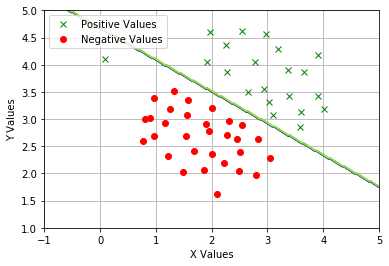

<Figure size 432x288 with 0 Axes>

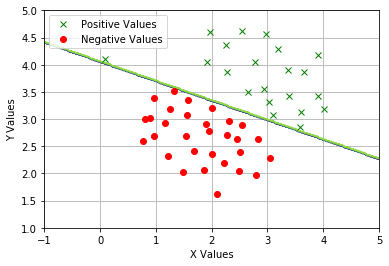

In [5]:
plt.figure()
DrawLimit(kernel_lin, pos, neg, -1,5,1,5)
plt.show()

kernel_lin = svm.SVC(C= 100, kernel = 'linear') 
kernel_lin.fit(X1, Y1.flatten())

plt.figure()
DrawLimit(kernel_lin, pos, neg, -1,5,1,5)
plt.show()

## Kernel Gaussiano

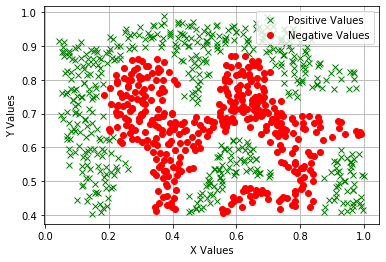

In [6]:
dataset2 = loadmat ("ex6data2.mat")
X2 = dataset2['X']
Y2 = dataset2['y']

pos = np.array([X2[i] for i in range(len(X2))if Y2[i]==1])
neg = np.array([X2[i] for i in range(len(X2))if Y2[i]==0])

plt.figure()
RepresentData(pos,neg)
plt.show()

### Entrenamiento del SVM
El SVM tiene 2 parámetros que podemos alterar
- C: Penalización a elementos mal clasificados
- gamma: Influencia de cada ejemplo de entrenamiento en el resultado


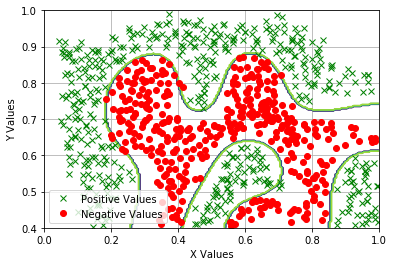

In [7]:
sigma = 0.1
gaussiananKernel = svm.SVC(C = 1, kernel = 'rbf', gamma = 1/(2*sigma **2))
gaussiananKernel.fit(X2,Y2.flatten())

DrawLimit(gaussiananKernel, pos, neg, 0.0,1.0,0.4,1.0)

## Evaluación del modelo
En este apartado evaluamos la precisión de un modelo mediante dos conjunto de datos distintos, de entrenamiento y evaluación, y el ajuste de los parametros C y gamma

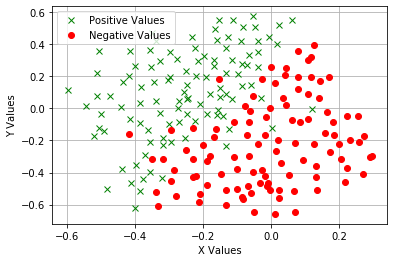

In [8]:
dataset3 = loadmat ("ex6data3.mat")
X3 = dataset3['X']
Y3 = dataset3['y']
xTest = dataset3['Xval'] 
yTest = dataset3['yval'] 
pos = np.array([X3[i] for i in range(len(X3))if Y3[i]==1])
neg = np.array([X3[i] for i in range(len(X3))if Y3[i]==0])

plt.figure()
RepresentData(pos,neg)
plt.show()

Trataremos ahora de obtener el modelo con menor porcentaje de fallos sobre el conjunto de datos. Para ello debemos comprobar, una vez entrenado, cuantos fallos y aciertos efectúa.

1.0


<Figure size 432x288 with 0 Axes>

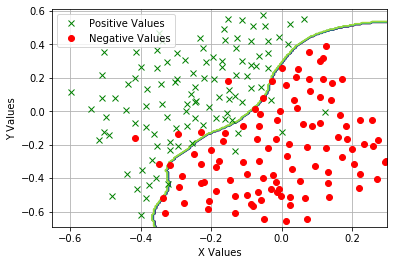

In [11]:
cVals = np.array([0.01, 0.03, 0.1, 0.3, 1., 3., 10., 30.])
sigmaVals = np.copy(cVals)

bestC = 0.01
bestSigma = 0.01
bestScore = -1
for c in  cVals:
    for sigma in sigmaVals:
        gamma = 1/(2*sigma **2)
        auxKernel = svm.SVC(C = c, kernel = 'rbf', gamma = gamma)
        auxKernel.fit(X3, Y3.flatten())
        score = auxKernel.score(xTest,yTest)
        if (score > bestScore):
            bestC = c
            bestSigma = sigma   
            bestScore = score


gKernel = svm.SVC (C = bestC, kernel = 'rbf', gamma =  1/(2*bestSigma **2))
gKernel.fit(X3, Y3.flatten())

plt.figure()
print(bestC)
DrawLimit(gKernel, pos, neg, -0.65, 0.3, -0.69, 0.61)
plt.show()

## Clasificación de correos

In [12]:
import process_email as pmail
import get_vocab_dict as getvoc 
import codecs
import collections

vocabDict = collections.OrderedDict(getvoc.getVocabDict())
X_input = np.zeros(shape=(1000, len(vocabDict))) 
Y = np.zeros(1000)

for i in range(1,500):  
    Y[i] = 1  
    path = "spam/{:04d}.txt".format(i) 
    email = pmail.email2TokenList(codecs.open (path, 'r', encoding = 'utf-8', errors = 'ignore').read())
    for j in range (len(email)):
        if(email [j] in vocabDict):    
            X_input[i][list(vocabDict.keys()).index(email[j])] = 1
            
for i in range(1,500): 
    Y[500+i] = 0   
    path = "spam/{:04d}.txt".format(i)    
    email = pmail.email2TokenList(codecs.open (path, 'r', encoding = 'utf-8', errors = 'ignore').read()) 
    for j in range (len(email)):    
        if(email [j] in vocabDict):    
            X_input[500+i][list(vocabDict.keys()).index(email[j])] = 1 
            
spam_processor = svm.SVC(C = 1.0, kernel = 'linear')
spam_processor.fit(X_input, Y.ravel())


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)